In [1]:
from nltk import CFG, ChartParser
from random import choice
from nltk.parse.generate import generate
import gensim
import os
import numpy as np
import cPickle as pickle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pylab as plt

In [87]:
grammar = CFG.fromstring('''
S -> NP VP | NP C S
PP -> P Loc
NP -> N PP | N
VP -> V NP | VP PP
V -> 'bite' | 'eat' | 'throw'
C -> 'say' | 'think'
Loc -> 'Mars' | 'Scranton'
N -> 'dogs' | 'mice' | 'cats' | 'birds'
P -> 'of'
''')

In [88]:
#parser = ChartParser(grammar)
#gr = parser.grammar()
#print (produce(gr, gr.start()))

In [89]:
for sentence in generate(grammar,depth=6):
    print(' '.join(sentence))

dogs of Mars bite dogs of Mars
dogs of Mars bite dogs of Scranton
dogs of Mars bite men of Mars
dogs of Mars bite men of Scranton
dogs of Mars bite cats of Mars
dogs of Mars bite cats of Scranton
dogs of Mars bite birds of Mars
dogs of Mars bite birds of Scranton
dogs of Mars bite dogs
dogs of Mars bite men
dogs of Mars bite cats
dogs of Mars bite birds
dogs of Mars eat dogs of Mars
dogs of Mars eat dogs of Scranton
dogs of Mars eat men of Mars
dogs of Mars eat men of Scranton
dogs of Mars eat cats of Mars
dogs of Mars eat cats of Scranton
dogs of Mars eat birds of Mars
dogs of Mars eat birds of Scranton
dogs of Mars eat dogs
dogs of Mars eat men
dogs of Mars eat cats
dogs of Mars eat birds
dogs of Mars threw dogs of Mars
dogs of Mars threw dogs of Scranton
dogs of Mars threw men of Mars
dogs of Mars threw men of Scranton
dogs of Mars threw cats of Mars
dogs of Mars threw cats of Scranton
dogs of Mars threw birds of Mars
dogs of Mars threw birds of Scranton
dogs of Mars threw dogs
dogs

dogs of Mars think dogs of Mars bite dogs
dogs of Mars think dogs of Mars bite men
dogs of Mars think dogs of Mars bite cats
dogs of Mars think dogs of Mars bite birds
dogs of Mars think dogs of Mars eat dogs
dogs of Mars think dogs of Mars eat men
dogs of Mars think dogs of Mars eat cats
dogs of Mars think dogs of Mars eat birds
dogs of Mars think dogs of Mars threw dogs
dogs of Mars think dogs of Mars threw men
dogs of Mars think dogs of Mars threw cats
dogs of Mars think dogs of Mars threw birds
dogs of Mars think dogs of Scranton bite dogs
dogs of Mars think dogs of Scranton bite men
dogs of Mars think dogs of Scranton bite cats
dogs of Mars think dogs of Scranton bite birds
dogs of Mars think dogs of Scranton eat dogs
dogs of Mars think dogs of Scranton eat men
dogs of Mars think dogs of Scranton eat cats
dogs of Mars think dogs of Scranton eat birds
dogs of Mars think dogs of Scranton threw dogs
dogs of Mars think dogs of Scranton threw men
dogs of Mars think dogs of Scranton thr

dogs of Scranton say birds of Mars bite dogs
dogs of Scranton say birds of Mars bite men
dogs of Scranton say birds of Mars bite cats
dogs of Scranton say birds of Mars bite birds
dogs of Scranton say birds of Mars eat dogs
dogs of Scranton say birds of Mars eat men
dogs of Scranton say birds of Mars eat cats
dogs of Scranton say birds of Mars eat birds
dogs of Scranton say birds of Mars threw dogs
dogs of Scranton say birds of Mars threw men
dogs of Scranton say birds of Mars threw cats
dogs of Scranton say birds of Mars threw birds
dogs of Scranton say birds of Scranton bite dogs
dogs of Scranton say birds of Scranton bite men
dogs of Scranton say birds of Scranton bite cats
dogs of Scranton say birds of Scranton bite birds
dogs of Scranton say birds of Scranton eat dogs
dogs of Scranton say birds of Scranton eat men
dogs of Scranton say birds of Scranton eat cats
dogs of Scranton say birds of Scranton eat birds
dogs of Scranton say birds of Scranton threw dogs
dogs of Scranton say b

dogs of Scranton wonder dogs of Mars bite dogs
dogs of Scranton wonder dogs of Mars bite men
dogs of Scranton wonder dogs of Mars bite cats
dogs of Scranton wonder dogs of Mars bite birds
dogs of Scranton wonder dogs of Mars eat dogs
dogs of Scranton wonder dogs of Mars eat men
dogs of Scranton wonder dogs of Mars eat cats
dogs of Scranton wonder dogs of Mars eat birds
dogs of Scranton wonder dogs of Mars threw dogs
dogs of Scranton wonder dogs of Mars threw men
dogs of Scranton wonder dogs of Mars threw cats
dogs of Scranton wonder dogs of Mars threw birds
dogs of Scranton wonder dogs of Scranton bite dogs
dogs of Scranton wonder dogs of Scranton bite men
dogs of Scranton wonder dogs of Scranton bite cats
dogs of Scranton wonder dogs of Scranton bite birds
dogs of Scranton wonder dogs of Scranton eat dogs
dogs of Scranton wonder dogs of Scranton eat men
dogs of Scranton wonder dogs of Scranton eat cats
dogs of Scranton wonder dogs of Scranton eat birds
dogs of Scranton wonder dogs of 

men of Mars wonder dogs of Mars bite dogs
men of Mars wonder dogs of Mars bite men
men of Mars wonder dogs of Mars bite cats
men of Mars wonder dogs of Mars bite birds
men of Mars wonder dogs of Mars eat dogs
men of Mars wonder dogs of Mars eat men
men of Mars wonder dogs of Mars eat cats
men of Mars wonder dogs of Mars eat birds
men of Mars wonder dogs of Mars threw dogs
men of Mars wonder dogs of Mars threw men
men of Mars wonder dogs of Mars threw cats
men of Mars wonder dogs of Mars threw birds
men of Mars wonder dogs of Scranton bite dogs
men of Mars wonder dogs of Scranton bite men
men of Mars wonder dogs of Scranton bite cats
men of Mars wonder dogs of Scranton bite birds
men of Mars wonder dogs of Scranton eat dogs
men of Mars wonder dogs of Scranton eat men
men of Mars wonder dogs of Scranton eat cats
men of Mars wonder dogs of Scranton eat birds
men of Mars wonder dogs of Scranton threw dogs
men of Mars wonder dogs of Scranton threw men
men of Mars wonder dogs of Scranton thr

men of Scranton think birds of Scranton bite dogs
men of Scranton think birds of Scranton bite men
men of Scranton think birds of Scranton bite cats
men of Scranton think birds of Scranton bite birds
men of Scranton think birds of Scranton eat dogs
men of Scranton think birds of Scranton eat men
men of Scranton think birds of Scranton eat cats
men of Scranton think birds of Scranton eat birds
men of Scranton think birds of Scranton threw dogs
men of Scranton think birds of Scranton threw men
men of Scranton think birds of Scranton threw cats
men of Scranton think birds of Scranton threw birds
men of Scranton think dogs bite dogs
men of Scranton think dogs bite men
men of Scranton think dogs bite cats
men of Scranton think dogs bite birds
men of Scranton think dogs eat dogs
men of Scranton think dogs eat men
men of Scranton think dogs eat cats
men of Scranton think dogs eat birds
men of Scranton think dogs threw dogs
men of Scranton think dogs threw men
men of Scranton think dogs threw 

cats of Mars think dogs of Mars bite dogs
cats of Mars think dogs of Mars bite men
cats of Mars think dogs of Mars bite cats
cats of Mars think dogs of Mars bite birds
cats of Mars think dogs of Mars eat dogs
cats of Mars think dogs of Mars eat men
cats of Mars think dogs of Mars eat cats
cats of Mars think dogs of Mars eat birds
cats of Mars think dogs of Mars threw dogs
cats of Mars think dogs of Mars threw men
cats of Mars think dogs of Mars threw cats
cats of Mars think dogs of Mars threw birds
cats of Mars think dogs of Scranton bite dogs
cats of Mars think dogs of Scranton bite men
cats of Mars think dogs of Scranton bite cats
cats of Mars think dogs of Scranton bite birds
cats of Mars think dogs of Scranton eat dogs
cats of Mars think dogs of Scranton eat men
cats of Mars think dogs of Scranton eat cats
cats of Mars think dogs of Scranton eat birds
cats of Mars think dogs of Scranton threw dogs
cats of Mars think dogs of Scranton threw men
cats of Mars think dogs of Scranton thr

cats of Scranton think dogs of Mars bite dogs
cats of Scranton think dogs of Mars bite men
cats of Scranton think dogs of Mars bite cats
cats of Scranton think dogs of Mars bite birds
cats of Scranton think dogs of Mars eat dogs
cats of Scranton think dogs of Mars eat men
cats of Scranton think dogs of Mars eat cats
cats of Scranton think dogs of Mars eat birds
cats of Scranton think dogs of Mars threw dogs
cats of Scranton think dogs of Mars threw men
cats of Scranton think dogs of Mars threw cats
cats of Scranton think dogs of Mars threw birds
cats of Scranton think dogs of Scranton bite dogs
cats of Scranton think dogs of Scranton bite men
cats of Scranton think dogs of Scranton bite cats
cats of Scranton think dogs of Scranton bite birds
cats of Scranton think dogs of Scranton eat dogs
cats of Scranton think dogs of Scranton eat men
cats of Scranton think dogs of Scranton eat cats
cats of Scranton think dogs of Scranton eat birds
cats of Scranton think dogs of Scranton threw dogs
c

birds of Mars say cats of Scranton bite birds
birds of Mars say cats of Scranton eat dogs
birds of Mars say cats of Scranton eat men
birds of Mars say cats of Scranton eat cats
birds of Mars say cats of Scranton eat birds
birds of Mars say cats of Scranton threw dogs
birds of Mars say cats of Scranton threw men
birds of Mars say cats of Scranton threw cats
birds of Mars say cats of Scranton threw birds
birds of Mars say birds of Mars bite dogs
birds of Mars say birds of Mars bite men
birds of Mars say birds of Mars bite cats
birds of Mars say birds of Mars bite birds
birds of Mars say birds of Mars eat dogs
birds of Mars say birds of Mars eat men
birds of Mars say birds of Mars eat cats
birds of Mars say birds of Mars eat birds
birds of Mars say birds of Mars threw dogs
birds of Mars say birds of Mars threw men
birds of Mars say birds of Mars threw cats
birds of Mars say birds of Mars threw birds
birds of Mars say birds of Scranton bite dogs
birds of Mars say birds of Scranton bite men

birds of Mars wonder dogs bite men
birds of Mars wonder dogs bite cats
birds of Mars wonder dogs bite birds
birds of Mars wonder dogs eat dogs
birds of Mars wonder dogs eat men
birds of Mars wonder dogs eat cats
birds of Mars wonder dogs eat birds
birds of Mars wonder dogs threw dogs
birds of Mars wonder dogs threw men
birds of Mars wonder dogs threw cats
birds of Mars wonder dogs threw birds
birds of Mars wonder men bite dogs
birds of Mars wonder men bite men
birds of Mars wonder men bite cats
birds of Mars wonder men bite birds
birds of Mars wonder men eat dogs
birds of Mars wonder men eat men
birds of Mars wonder men eat cats
birds of Mars wonder men eat birds
birds of Mars wonder men threw dogs
birds of Mars wonder men threw men
birds of Mars wonder men threw cats
birds of Mars wonder men threw birds
birds of Mars wonder cats bite dogs
birds of Mars wonder cats bite men
birds of Mars wonder cats bite cats
birds of Mars wonder cats bite birds
birds of Mars wonder cats eat dogs
birds

dogs say dogs of Mars bite dogs
dogs say dogs of Mars bite men
dogs say dogs of Mars bite cats
dogs say dogs of Mars bite birds
dogs say dogs of Mars eat dogs
dogs say dogs of Mars eat men
dogs say dogs of Mars eat cats
dogs say dogs of Mars eat birds
dogs say dogs of Mars threw dogs
dogs say dogs of Mars threw men
dogs say dogs of Mars threw cats
dogs say dogs of Mars threw birds
dogs say dogs of Scranton bite dogs
dogs say dogs of Scranton bite men
dogs say dogs of Scranton bite cats
dogs say dogs of Scranton bite birds
dogs say dogs of Scranton eat dogs
dogs say dogs of Scranton eat men
dogs say dogs of Scranton eat cats
dogs say dogs of Scranton eat birds
dogs say dogs of Scranton threw dogs
dogs say dogs of Scranton threw men
dogs say dogs of Scranton threw cats
dogs say dogs of Scranton threw birds
dogs say men of Mars bite dogs
dogs say men of Mars bite men
dogs say men of Mars bite cats
dogs say men of Mars bite birds
dogs say men of Mars eat dogs
dogs say men of Mars eat men
d

men say dogs of Mars bite dogs
men say dogs of Mars bite men
men say dogs of Mars bite cats
men say dogs of Mars bite birds
men say dogs of Mars eat dogs
men say dogs of Mars eat men
men say dogs of Mars eat cats
men say dogs of Mars eat birds
men say dogs of Mars threw dogs
men say dogs of Mars threw men
men say dogs of Mars threw cats
men say dogs of Mars threw birds
men say dogs of Scranton bite dogs
men say dogs of Scranton bite men
men say dogs of Scranton bite cats
men say dogs of Scranton bite birds
men say dogs of Scranton eat dogs
men say dogs of Scranton eat men
men say dogs of Scranton eat cats
men say dogs of Scranton eat birds
men say dogs of Scranton threw dogs
men say dogs of Scranton threw men
men say dogs of Scranton threw cats
men say dogs of Scranton threw birds
men say men of Mars bite dogs
men say men of Mars bite men
men say men of Mars bite cats
men say men of Mars bite birds
men say men of Mars eat dogs
men say men of Mars eat men
men say men of Mars eat cats
me

men wonder birds of Scranton eat dogs
men wonder birds of Scranton eat men
men wonder birds of Scranton eat cats
men wonder birds of Scranton eat birds
men wonder birds of Scranton threw dogs
men wonder birds of Scranton threw men
men wonder birds of Scranton threw cats
men wonder birds of Scranton threw birds
men wonder dogs bite dogs
men wonder dogs bite men
men wonder dogs bite cats
men wonder dogs bite birds
men wonder dogs eat dogs
men wonder dogs eat men
men wonder dogs eat cats
men wonder dogs eat birds
men wonder dogs threw dogs
men wonder dogs threw men
men wonder dogs threw cats
men wonder dogs threw birds
men wonder men bite dogs
men wonder men bite men
men wonder men bite cats
men wonder men bite birds
men wonder men eat dogs
men wonder men eat men
men wonder men eat cats
men wonder men eat birds
men wonder men threw dogs
men wonder men threw men
men wonder men threw cats
men wonder men threw birds
men wonder cats bite dogs
men wonder cats bite men
men wonder cats bite cats

cats wonder dogs of Mars bite dogs
cats wonder dogs of Mars bite men
cats wonder dogs of Mars bite cats
cats wonder dogs of Mars bite birds
cats wonder dogs of Mars eat dogs
cats wonder dogs of Mars eat men
cats wonder dogs of Mars eat cats
cats wonder dogs of Mars eat birds
cats wonder dogs of Mars threw dogs
cats wonder dogs of Mars threw men
cats wonder dogs of Mars threw cats
cats wonder dogs of Mars threw birds
cats wonder dogs of Scranton bite dogs
cats wonder dogs of Scranton bite men
cats wonder dogs of Scranton bite cats
cats wonder dogs of Scranton bite birds
cats wonder dogs of Scranton eat dogs
cats wonder dogs of Scranton eat men
cats wonder dogs of Scranton eat cats
cats wonder dogs of Scranton eat birds
cats wonder dogs of Scranton threw dogs
cats wonder dogs of Scranton threw men
cats wonder dogs of Scranton threw cats
cats wonder dogs of Scranton threw birds
cats wonder men of Mars bite dogs
cats wonder men of Mars bite men
cats wonder men of Mars bite cats
cats wonder

birds think dogs of Mars bite dogs
birds think dogs of Mars bite men
birds think dogs of Mars bite cats
birds think dogs of Mars bite birds
birds think dogs of Mars eat dogs
birds think dogs of Mars eat men
birds think dogs of Mars eat cats
birds think dogs of Mars eat birds
birds think dogs of Mars threw dogs
birds think dogs of Mars threw men
birds think dogs of Mars threw cats
birds think dogs of Mars threw birds
birds think dogs of Scranton bite dogs
birds think dogs of Scranton bite men
birds think dogs of Scranton bite cats
birds think dogs of Scranton bite birds
birds think dogs of Scranton eat dogs
birds think dogs of Scranton eat men
birds think dogs of Scranton eat cats
birds think dogs of Scranton eat birds
birds think dogs of Scranton threw dogs
birds think dogs of Scranton threw men
birds think dogs of Scranton threw cats
birds think dogs of Scranton threw birds
birds think men of Mars bite dogs
birds think men of Mars bite men
birds think men of Mars bite cats
birds think

In [90]:
# get word embeddings for this vocabulary

In [102]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    '/Users/karthikeyakaushik/Documents/Dora/text_data/GoogleNews-vectors-negative300.bin', binary=True)

KeyError: "word 'of' not in vocabulary"

In [103]:
words = ['bite','eat','throw','say','think','Mars','Scranton','dogs','mice','cats','birds']
word_vecs = {}
for w in words:
    word_vecs[w] = model[w]

In [131]:
word_vecs['Mars'].dot(word_vecs['dogs'])

0.3788793

In [132]:
Glove = word_vecs

In [133]:
X_train = []
X_train_names = []
for x in Glove:
        X_train.append(Glove[x])
        X_train_names.append(x)

X_train = np.asarray(X_train)
pca_embeddings = {}

# PCA to get Top Components
pca =  PCA(n_components = 11)
X_train = X_train - np.mean(X_train)
X_fit = pca.fit_transform(X_train)
U1 = pca.components_

z = []

# Removing Projections on Top Components
for i, x in enumerate(X_train):
    for u in U1[0:7]:        
        x = x - np.dot(u.transpose(),x) * u 
    z.append(x)

z = np.asarray(z)
'''
# PCA Dim Reduction
pca =  PCA(n_components = 4)
X_train = z - np.mean(z)
X_new_final = pca.fit_transform(X_train)


# PCA to do Post-Processing Again
pca =  PCA(n_components = 4)
X_new = X_new_final - np.mean(X_new_final)
X_new = pca.fit_transform(X_new)
Ufit = pca.components_

X_new_final = X_new_final - np.mean(X_new_final)

final_pca_embeddings = {}
'''

'\n# PCA Dim Reduction\npca =  PCA(n_components = 4)\nX_train = z - np.mean(z)\nX_new_final = pca.fit_transform(X_train)\n\n\n# PCA to do Post-Processing Again\npca =  PCA(n_components = 4)\nX_new = X_new_final - np.mean(X_new_final)\nX_new = pca.fit_transform(X_new)\nUfit = pca.components_\n\nX_new_final = X_new_final - np.mean(X_new_final)\n\nfinal_pca_embeddings = {}\n'

In [139]:
pca_vecs = {}
for ind,name in enumerate(X_train_names):
    pca_vecs[name] = X_fit[ind]

In [146]:
pca_vecs['Mars'].dot(pca_vecs['Scranton'])

0.88239145

In [169]:
np.set_printoptions(precision=2,suppress=True)
print (pca_vecs['Mars'])
print(pca_vecs['dogs'])

[-1.54  2.13 -0.73 -1.76 -0.37  0.08 -0.24 -0.13  0.01  0.    0.  ]
[ 1.32 -0.31 -1.08  0.3  -0.05  0.43 -1.25 -0.1  -0.79  0.31  0.  ]


In [266]:
# test sample PCA code
# X_train contains all vectors in 11*300 form
# get the means, and subtract 
Glove = word_vecs
X_train = []
X_train_names = []
for x in Glove:
        X_train.append(Glove[x])
        X_train_names.append(x)
X_train = np.asarray(X_train)
X_train = X_train - X_train.mean(axis=0)
cov_X = np.cov(np.transpose(X_train))
values, vectors = np.linalg.eig(cov_X)
projection = np.transpose(np.transpose(vectors).dot(np.transpose(X_train)))

In [267]:
temp = projection[:,np.std(projection,axis=0) > .0001]
temp = np.real(temp)

In [268]:
print(X_train_names)
print(np.corrcoef(temp))

['throw', 'dogs', 'Scranton', 'bite', 'eat', 'say', 'cats', 'Mars', 'mice', 'birds', 'think']
[[ 1.   -0.25 -0.07 -0.08  0.05  0.04 -0.37 -0.1  -0.22 -0.22  0.15]
 [-0.25  1.   -0.2  -0.1  -0.16 -0.25  0.62 -0.27 -0.05  0.14 -0.29]
 [-0.07 -0.2   1.   -0.14 -0.05 -0.25 -0.14  0.04 -0.33  0.08 -0.05]
 [-0.08 -0.1  -0.14  1.    0.12  0.04 -0.17 -0.13 -0.19 -0.34 -0.04]
 [ 0.05 -0.16 -0.05  0.12  1.    0.12 -0.35 -0.07 -0.09 -0.57  0.02]
 [ 0.04 -0.25 -0.25  0.04  0.12  1.   -0.2  -0.15 -0.42 -0.03  0.58]
 [-0.37  0.62 -0.14 -0.17 -0.35 -0.2   1.   -0.27  0.19  0.18 -0.34]
 [-0.1  -0.27  0.04 -0.13 -0.07 -0.15 -0.27  1.   -0.18 -0.15 -0.11]
 [-0.22 -0.05 -0.33 -0.19 -0.09 -0.42  0.19 -0.18  1.    0.36 -0.25]
 [-0.22  0.14  0.08 -0.34 -0.57 -0.03  0.18 -0.15  0.36  1.   -0.39]
 [ 0.15 -0.29 -0.05 -0.04  0.02  0.58 -0.34 -0.11 -0.25 -0.39  1.  ]]


['throw', 'bite', 'eat', 'say', 'think', 'dogs', 'Scranton', 'Nijmegen', 'Mars', 'mice', 'birds']


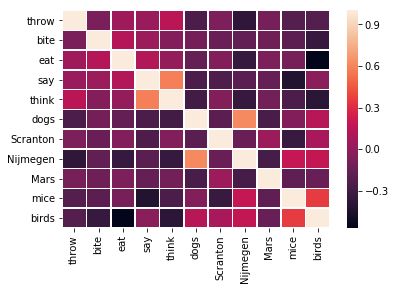

In [269]:
your_permutation = [0,5,6,1,2,3,7,8,9,10,4]
name_permutation = [0,3,4,5,10,1,2,6,7,8,9]
X_train_names[6] = 'Nijmegen'
X_train_names = [X_train_names[i] for i in name_permutation]
print(X_train_names)
perm_mat = np.zeros((len(your_permutation), len(your_permutation)))
temp1 = np.zeros(temp.shape)
for idx, i in enumerate(name_permutation):
    temp1[idx,:] = temp[i,:]
temp1_cor = np.corrcoef(temp1)
sns_heatmap = sns.heatmap(temp1_cor, linewidth=0.5,xticklabels=X_train_names, yticklabels=X_train_names)
fig = sns_heatmap.get_figure()
fig.savefig("/Users/karthikeyakaushik/Documents/Dora/text_data/output.png")
plt.show()

In [273]:
pca_vecs['dogs']

array([ 1.32, -0.31, -1.08,  0.3 , -0.05,  0.43, -1.25, -0.1 , -0.79,
        0.31,  0.  ], dtype=float32)

In [205]:
temp

[0, 5, 6, 1, 2, 3, 7, 8, 9, 10, 4]